# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

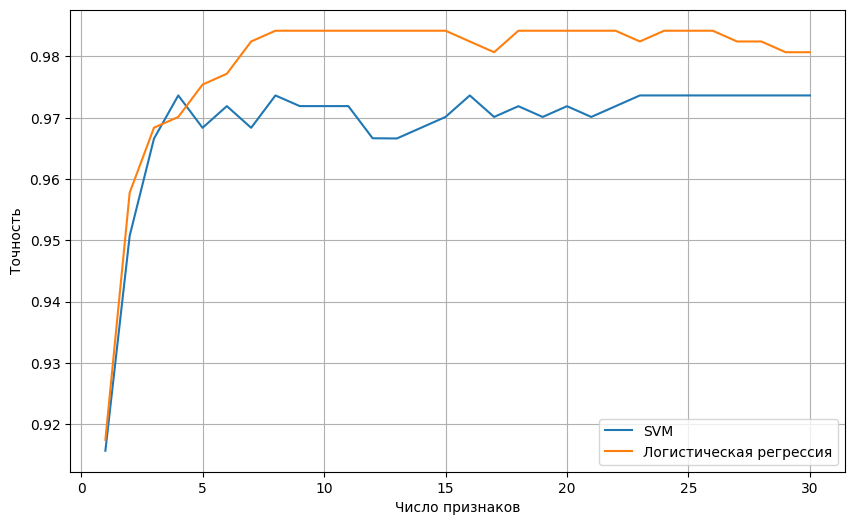

In [ ]:
logreg = LogisticRegression(max_iter=5000)
svc = svm.SVC()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

remaining_features = list(range(X.shape[1]))
selected_features = []
k_range = []
svm_scores = []
logreg_scores = []

while remaining_features:
    scores_svm = []
    scores_logreg = []

    for feature in remaining_features:
        test_features = selected_features + [feature]
        X_test = X_scaled[:, test_features]

        score_svm = cross_val_score(svc, X_test, y, cv=5).mean()
        scores_svm.append((score_svm, feature))

        score_logreg = cross_val_score(logreg, X_test, y, cv=5).mean()
        scores_logreg.append((score_logreg, feature))

    best_svm_score, best_svm_feature = max(scores_svm)
    best_logreg_score, best_logreg_feature = max(scores_logreg)

    if best_svm_score >= best_logreg_score:
        selected_features.append(best_svm_feature)
        remaining_features.remove(best_svm_feature)
    else:
        selected_features.append(best_logreg_feature)
        remaining_features.remove(best_logreg_feature)

    X_selected = X_scaled[:, selected_features]
    k_range.append(len(selected_features))
    final_svm_score = cross_val_score(svc, X_selected, y, cv=5).mean()
    final_logreg_score = cross_val_score(logreg, X_selected, y, cv=5).mean()
    svm_scores.append(final_svm_score)
    logreg_scores.append(final_logreg_score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, svm_scores, label="SVM")
plt.plot(k_range, logreg_scores, label="Логистическая регрессия")
plt.xlabel("Число признаков")
plt.ylabel("Точность")
plt.legend()
plt.grid()
plt.show()


# Backward elimination (2pts)

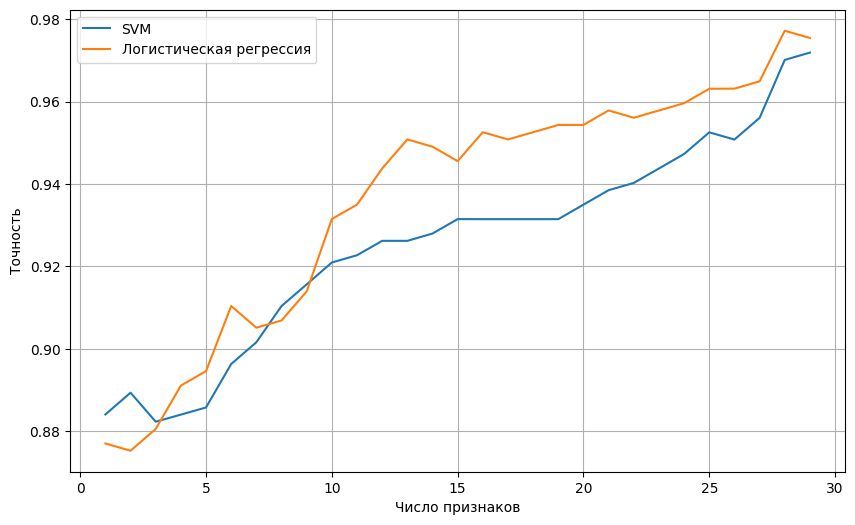

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logreg = LogisticRegression(max_iter=5000)
svc = svm.SVC()

remaining_features = list(range(X.shape[1]))
k_range = []
svm_scores = []
logreg_scores = []

while len(remaining_features) > 1:
    scores_svm = []
    scores_logreg = []

    for feature in remaining_features:
        test_features = [f for f in remaining_features if f != feature]
        X_test = X_scaled[:, test_features]

        score_svm = cross_val_score(svc, X_test, y, cv=5).mean()
        scores_svm.append((score_svm, feature))
        score_logreg = cross_val_score(logreg, X_test, y, cv=5).mean()
        scores_logreg.append((score_logreg, feature))

    worst_svm_score, worst_svm_feature = min(scores_svm)
    worst_logreg_score, worst_logreg_feature = min(scores_logreg)

    if worst_svm_score >= worst_logreg_score:
        remaining_features.remove(worst_logreg_feature)
    else:
        remaining_features.remove(worst_svm_feature)
    X_selected = X_scaled[:, remaining_features]
    k_range.append(len(remaining_features))
    final_svm_score = cross_val_score(svc, X_selected, y, cv=5).mean()
    final_logreg_score = cross_val_score(logreg, X_selected, y, cv=5).mean()
    svm_scores.append(final_svm_score)
    logreg_scores.append(final_logreg_score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, svm_scores, label="SVM")
plt.plot(k_range, logreg_scores, label="Логистическая регрессия")
plt.xlabel("Число признаков")
plt.ylabel("Точность")
plt.legend()
plt.grid()
plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

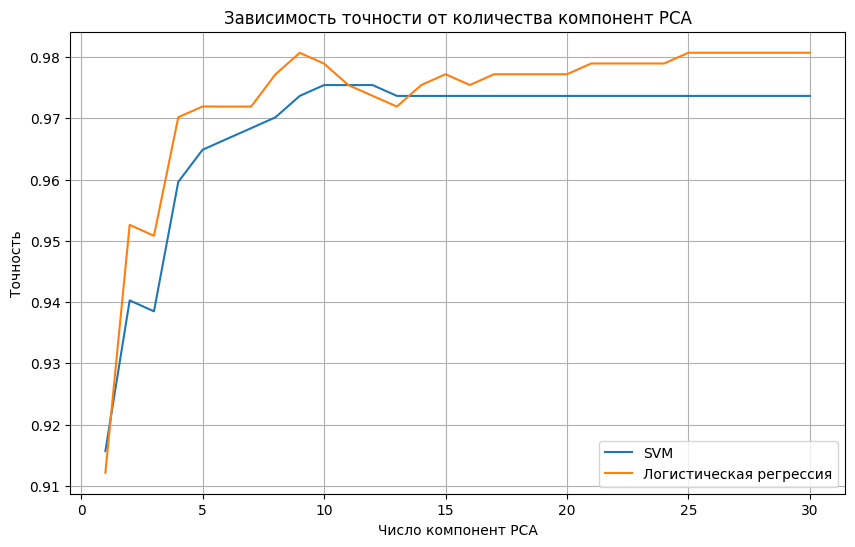

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(max_iter=5000)
svc = svm.SVC()

n_components_range = range(1, X.shape[1] + 1)
svm_scores = []
logreg_scores = []

for n_components in n_components_range:
    pca = decomposition.PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    svm_score = cross_val_score(svc, X_pca, y, cv=5).mean()
    svm_scores.append(svm_score)

    logreg_score = cross_val_score(logreg, X_pca, y, cv=5).mean()
    logreg_scores.append(logreg_score)

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, svm_scores, label="SVM")
plt.plot(n_components_range, logreg_scores, label="Логистическая регрессия")
plt.xlabel("Число компонент PCA")
plt.ylabel("Точность")
plt.title("Зависимость точности от количества компонент PCA")
plt.legend()
plt.grid()

#  Выводы (1pts)

In [ ]:
Логистическая регрессия немного превосходит SVM по точности, но оба метода показывают хорошие результаты, особенно при достаточном количестве компонент PCA.